In [1]:
import wandb
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt


import seaborn as sns

In [2]:
def get_data(link):
    api = wandb.Api()
    run = api.run(link)
    history = run.scan_history()
    return pd.DataFrame(history)


def remove_nan(list):
    return [x for x in list if str(x) != "nan"]


def get_last_value(data, column):
    return remove_nan(data[column])[-1]

In [3]:
def plot_accuracy(data_1, data_2, data_3, x, y, label_1, label_2, label_3, title):
    y_1 = remove_nan(data_1[y])
    x_1 = list(range(len(y_1)))
    y_2 = remove_nan(data_2[y])
    y_3 = remove_nan(data_3[y])

    # size of the figure
    plt.figure(figsize=(10, 5))

    plt.plot(x_1, y_1[-len(y_1) :], label=label_1, linewidth=5)
    plt.plot(x_1, y_2[-len(y_1) :], label=label_2, linewidth=5)
    plt.plot(x_1, y_3[-len(y_1) :], label=label_3, linewidth=5)

    plt.xticks(x_1, fontsize=17)
    plt.yticks(fontsize=17)
    # reduce the number of ticks
    plt.locator_params(axis="x", nbins=10)

    plt.xlabel("FL Rounds", fontsize=20)
    plt.ylabel("Accuracy", fontsize=20)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=20)
    plt.grid()
    # reduce empty spaces
    plt.tight_layout()
    plt.show()

In [4]:
def plot_histogram(data_1, data_2, data_3, y):
    # Define the data for each bin
    baseline = [
        remove_nan(data_1[y[0]])[-1],
        remove_nan(data_1[y[1]])[-1],
        remove_nan(data_1[y[2]])[-1],
        remove_nan(data_1[y[3]])[-1],
        remove_nan(data_1[y[4]])[-1],
    ]
    fl_privacy = [
        remove_nan(data_2[y[0]])[-1],
        remove_nan(data_2[y[1]])[-1],
        remove_nan(data_2[y[2]])[-1],
        remove_nan(data_2[y[3]])[-1],
        remove_nan(data_2[y[4]])[-1],
    ]
    p2p_fl_privacy = [
        remove_nan(data_3[y[0]])[-1],
        remove_nan(data_3[y[1]])[-1],
        remove_nan(data_3[y[2]])[-1],
        remove_nan(data_3[y[3]])[-1],
        remove_nan(data_3[y[4]])[-1],
    ]

    # Define the ticks for the histogram
    x_axis = np.arange(len(y))

    # Set the figure size
    plt.figure(figsize=(10, 5))

    # Set the width of the bars
    bar_width = 0.2

    # Plot the bars
    plt.bar(x_axis - bar_width, baseline, width=bar_width, label="FL")
    plt.bar(x_axis, fl_privacy, width=bar_width, label="Private FL")
    plt.bar(
        x_axis + bar_width,
        p2p_fl_privacy,
        width=bar_width,
        label="P2P+Server (Private FL)",
    )

    # Set the x-axis ticks and labels
    y = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
    plt.xticks(x_axis, y, fontsize=12)

    # Set the y-axis label
    plt.ylabel("Frequency", fontsize=12)

    # Set the title
    plt.title("Histogram with 5 Ticks and 3 Bins", fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [5]:
def plot_cdf(baseline, fl, p2p):
    plt.figure(figsize=(10, 5))

    # Your two sets of data
    data1 = baseline
    data2 = fl
    data3 = p2p

    # Create kernel density estimate plots for both datasets with CDF
    sns.kdeplot(
        data1, fill=False, cumulative=True, label="FL", linestyle="-", linewidth=3
    )
    sns.kdeplot(
        data2,
        fill=False,
        cumulative=True,
        label="FL Private",
        linestyle="dashdot",
        linewidth=3,
    )
    sns.kdeplot(
        data3,
        fill=False,
        cumulative=True,
        label="P2P+Server (Private)",
        linestyle="dotted",
        linewidth=3,
    )
    # Add labels and title
    plt.xlabel("Values")
    plt.ylabel("Cumulative Probability")
    plt.title("Cumulative Distribution Function Plot")

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()


def plot_cdf_comparison(p2p_server, server_p2p):
    plt.figure(figsize=(10, 5))

    # Your two sets of data
    data1 = p2p_server
    data2 = server_p2p

    # Create kernel density estimate plots for both datasets with CDF
    sns.kdeplot(
        data1,
        fill=False,
        cumulative=True,
        label="P2P+Server",
        linestyle="-",
        linewidth=3,
    )
    sns.kdeplot(
        data2,
        fill=False,
        cumulative=True,
        label="Server+P2P",
        linestyle="dashdot",
        linewidth=3,
    )
    # Add labels and title
    plt.xlabel("Values")
    plt.ylabel("Cumulative Probability")
    plt.title("Cumulative Distribution Function Plot")

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

# 40% Public Data P2P+Server

In [6]:
baseline = get_data("/lucacorbucci/mnist_Sweeps/runs/pzl0ty0x")
private = get_data("/lucacorbucci/mnist_Sweeps/runs/goqjqeuu")
p2p_server = get_data("/lucacorbucci/mnist_Sweeps/runs/t9ln0wf0")

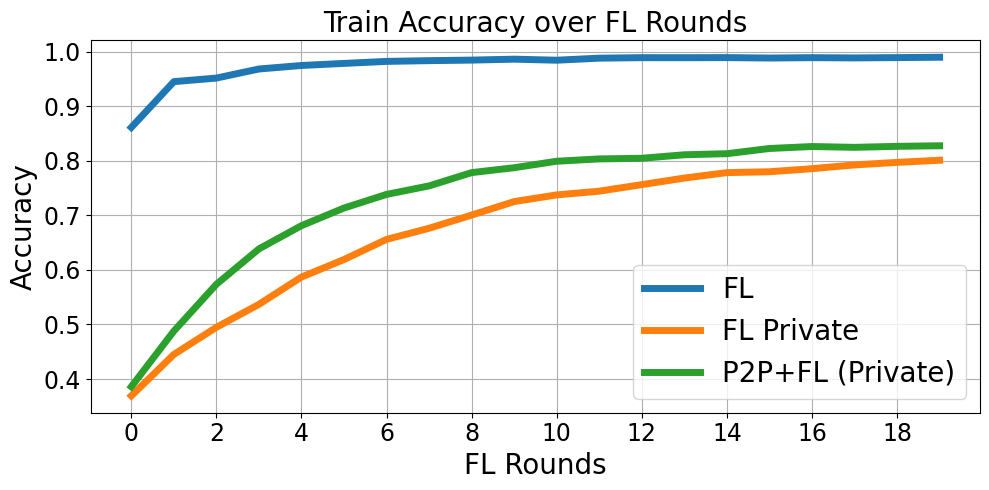

In [7]:
plot_accuracy(
    data_1=baseline,
    data_2=private,
    data_3=p2p_server,
    x="FL Round Server",
    y="Train accuracy",
    label_1="FL",
    label_2="FL Private",
    label_3="P2P+FL (Private)",
    title="Train Accuracy over FL Rounds",
)

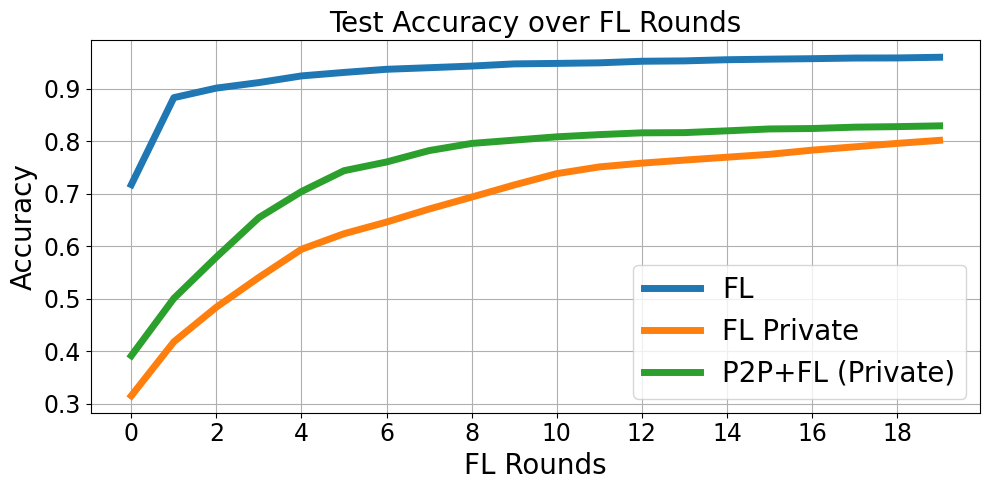

In [8]:
plot_accuracy(
    data_1=baseline,
    data_2=private,
    data_3=p2p_server,
    x="FL Round Server",
    y="Test Accuracy on the server",
    label_1="FL",
    label_2="FL Private",
    label_3="P2P+FL (Private)",
    title="Test Accuracy over FL Rounds",
)

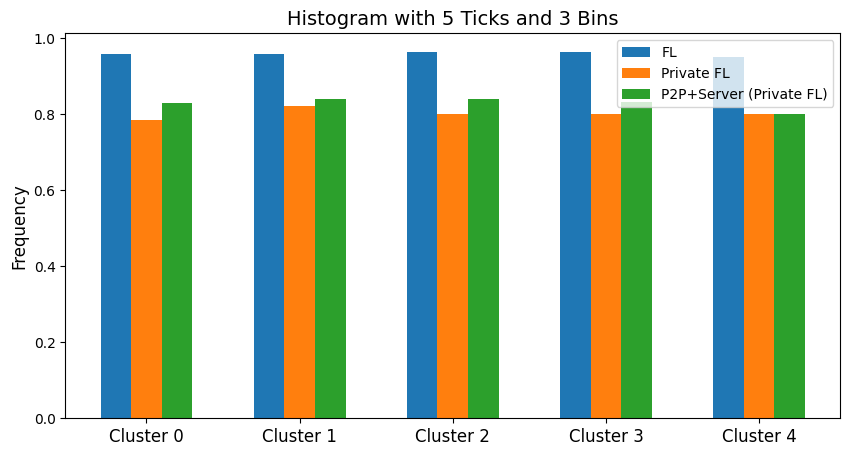

In [9]:
plot_histogram(
    data_1=baseline,
    data_2=private,
    data_3=p2p_server,
    y=[
        "Test Accuracy Cluster 0",
        "Test Accuracy Cluster 1",
        "Test Accuracy Cluster 2",
        "Test Accuracy Cluster 3",
        "Test Accuracy Cluster 4",
    ],
)

In [10]:
clusters_data = {}
for cluster_name in ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]:
    baseline_list = []
    private_list = []
    p2p_server_list = []
    for node_name in [
        "node 0",
        "node 1",
        "node 2",
        "node 3",
        "node 4",
        "node 5",
        "node 6",
        "node 7",
        "node 8",
        "node 9",
        "node 10",
        "node 11",
        "node 12",
        "node 13",
        "node 14",
    ]:
        last_baseline = get_last_value(
            baseline, f"Test Accuracy {cluster_name} {node_name}"
        )
        last_private = get_last_value(
            private, f"Test Accuracy {cluster_name} {node_name}"
        )
        last_p2p_server = get_last_value(
            p2p_server, f"Test Accuracy {cluster_name} {node_name}"
        )
        baseline_list.append(last_baseline)
        private_list.append(last_private)
        p2p_server_list.append(last_p2p_server)
    clusters_data[cluster_name] = {
        "baseline": baseline_list,
        "private": private_list,
        "p2p_server": p2p_server_list,
    }

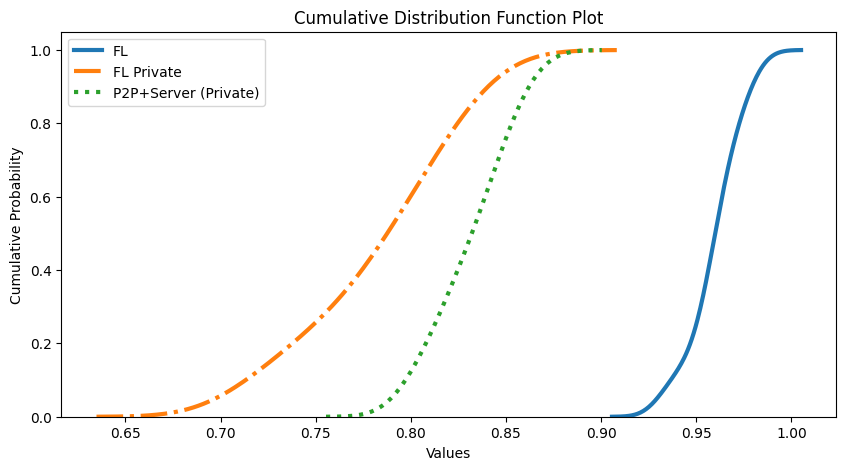

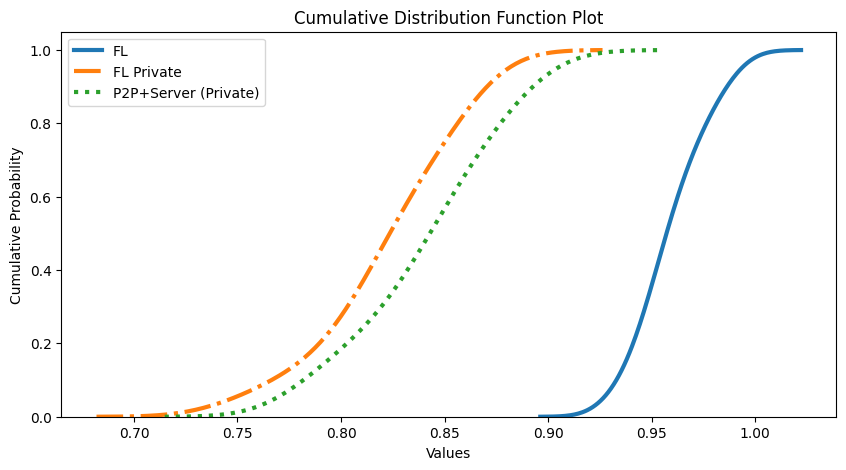

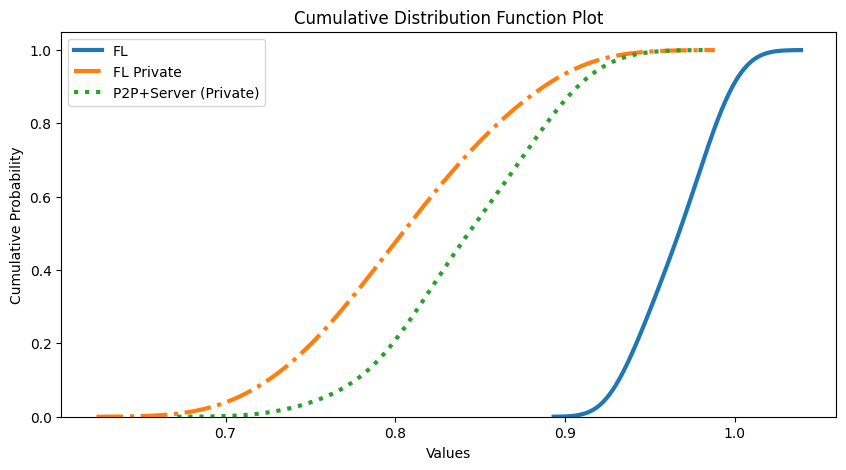

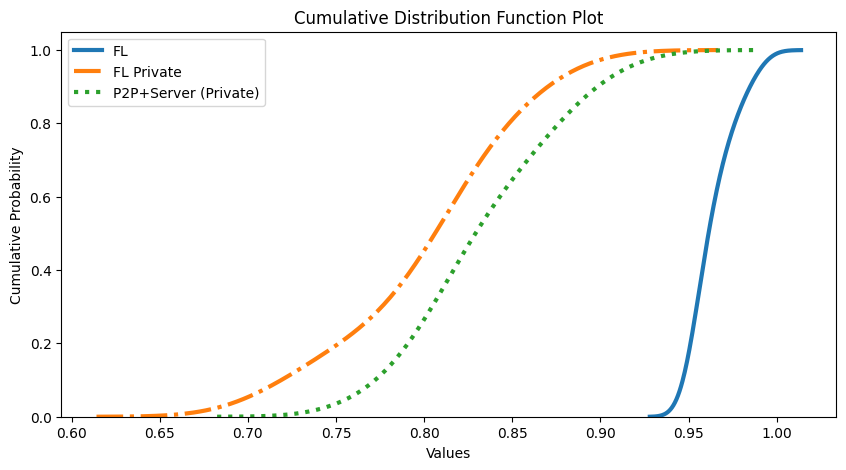

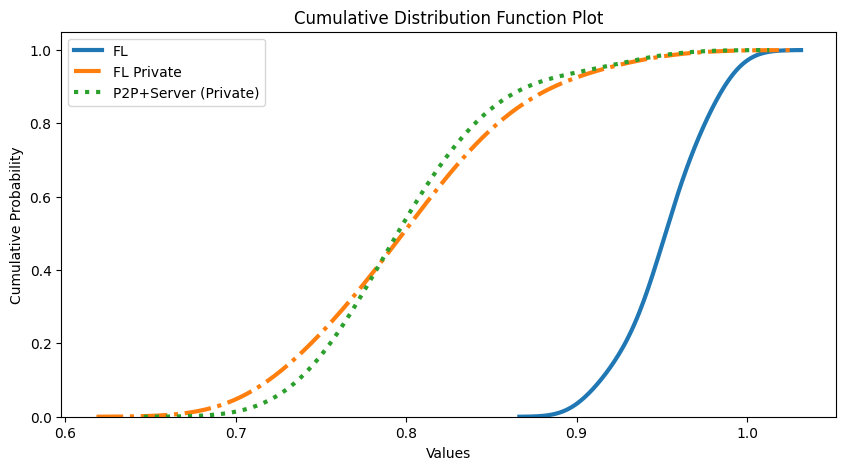

In [11]:
for cluster_name in ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]:
    plot_cdf(
        clusters_data[cluster_name]["baseline"],
        clusters_data[cluster_name]["private"],
        clusters_data[cluster_name]["p2p_server"],
    )

# 40% Public Data Server+P2P

In [12]:
only_p2p = get_data("/lucacorbucci/mnist_Sweeps/runs/4szv7nkm")
only_p2p_private = get_data("/lucacorbucci/mnist_Sweeps/runs/4rescuei")
server_p2p = get_data("/lucacorbucci/mnist_Sweeps/runs/ro90qcm5")

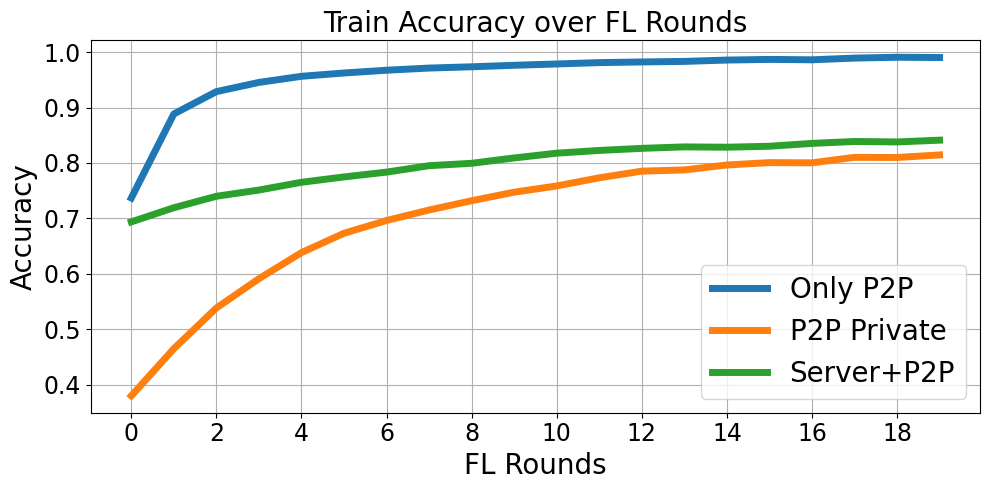

In [13]:
plot_accuracy(
    data_1=only_p2p,
    data_2=only_p2p_private,
    data_3=server_p2p,
    x="FL Round Server",
    y="Train accuracy",
    label_1="Only P2P",
    label_2="P2P Private",
    label_3="Server+P2P",
    title="Train Accuracy over FL Rounds",
)

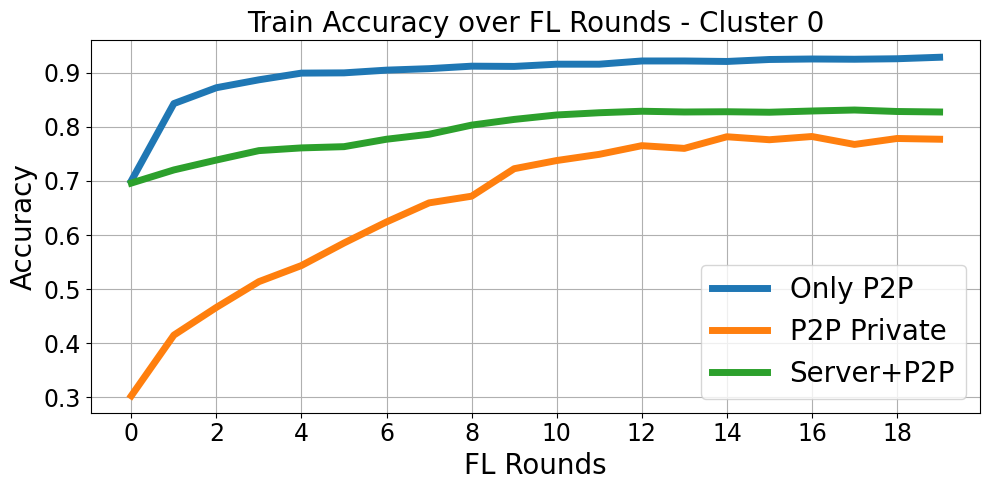

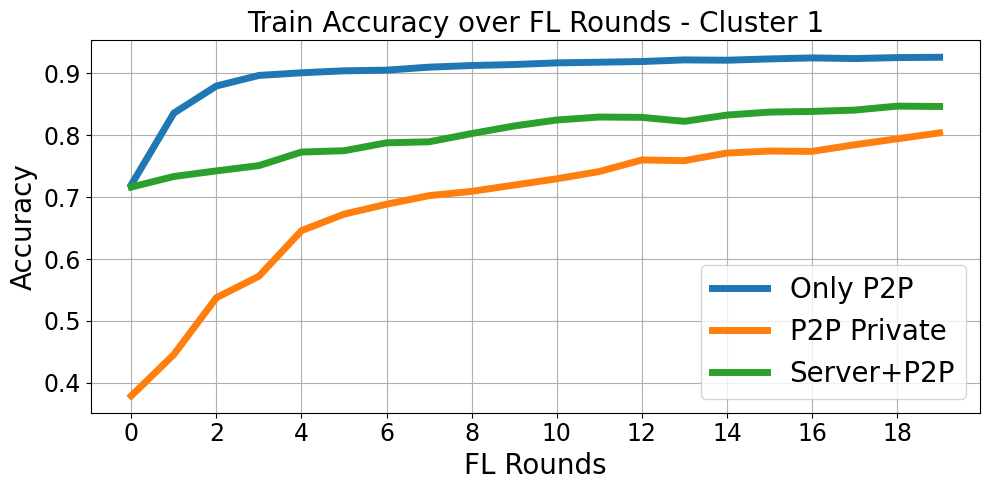

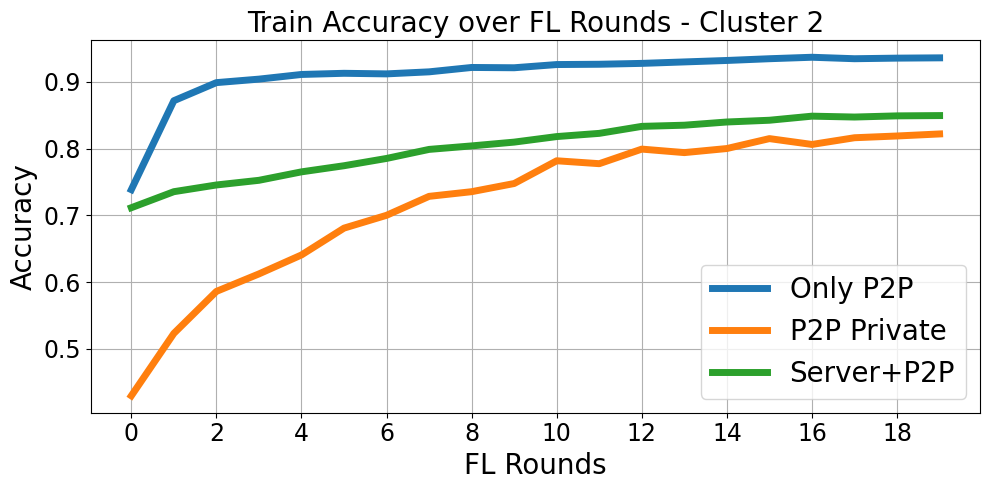

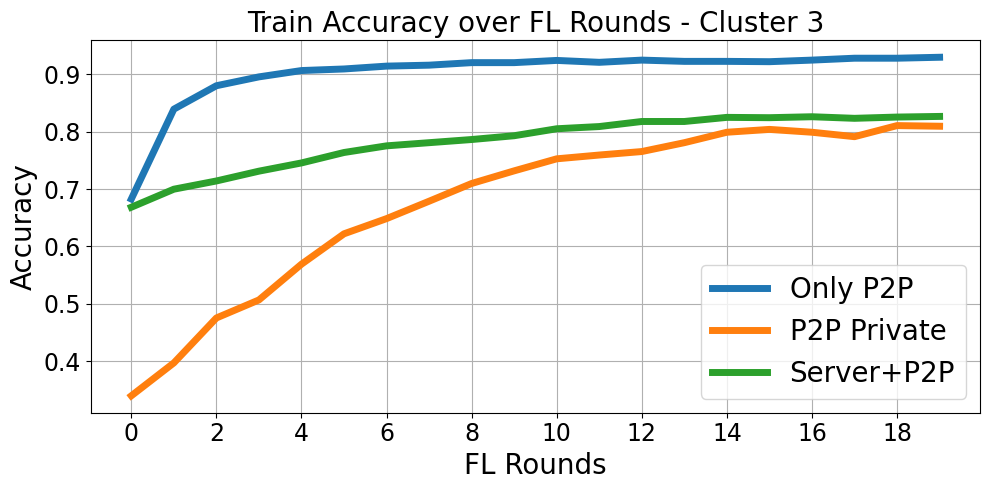

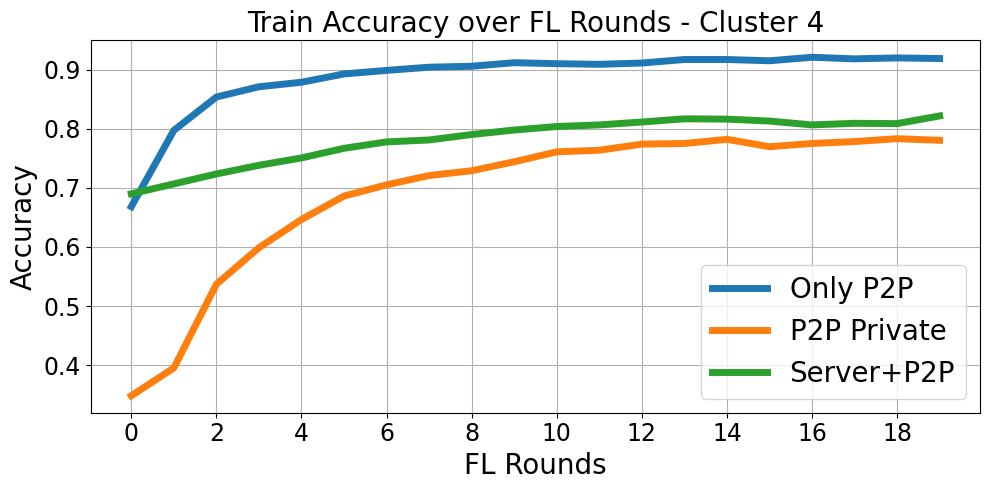

In [14]:
for cluster_name in ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]:
    plot_accuracy(
        data_1=only_p2p,
        data_2=only_p2p_private,
        data_3=server_p2p,
        x="FL Round Server",
        y=f"Test Accuracy {cluster_name}",
        label_1="Only P2P",
        label_2="P2P Private",
        label_3="Server+P2P",
        title="Train Accuracy over FL Rounds - " + cluster_name,
    )

In [15]:
# plot_histogram(
#     data_1=only_p2p,
#     data_2=only_p2p_private,
#     data_3=server_p2p,
#     y=[
#         "Test Accuracy Cluster 0",
#         "Test Accuracy Cluster 1",
#         "Test Accuracy Cluster 2",
#         "Test Accuracy Cluster 3",
#         "Test Accuracy Cluster 4",
#     ],
# )

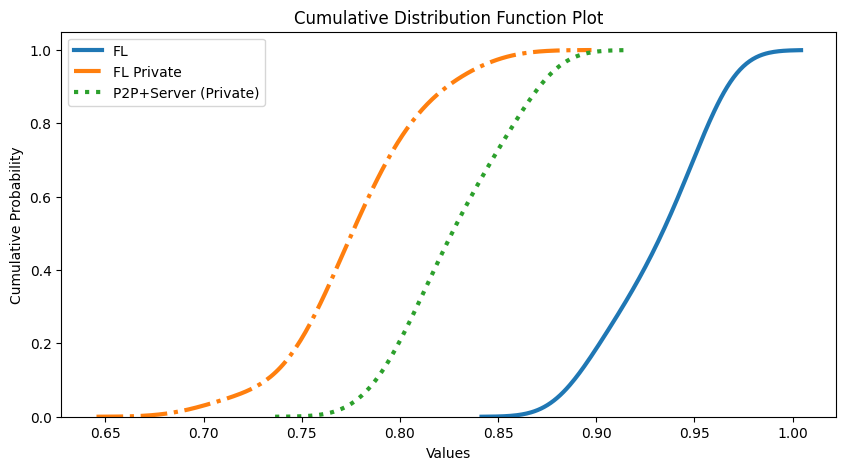

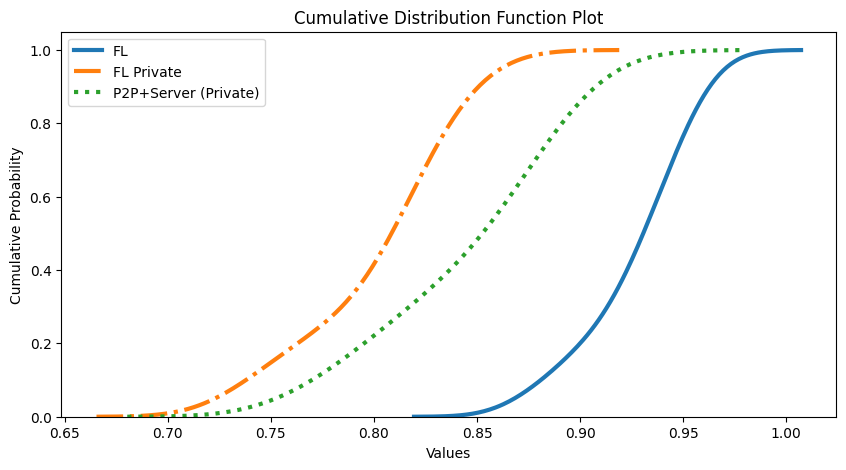

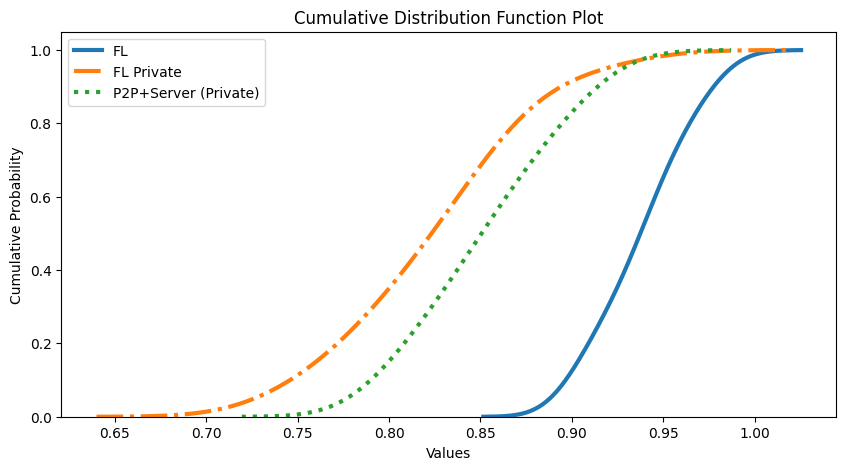

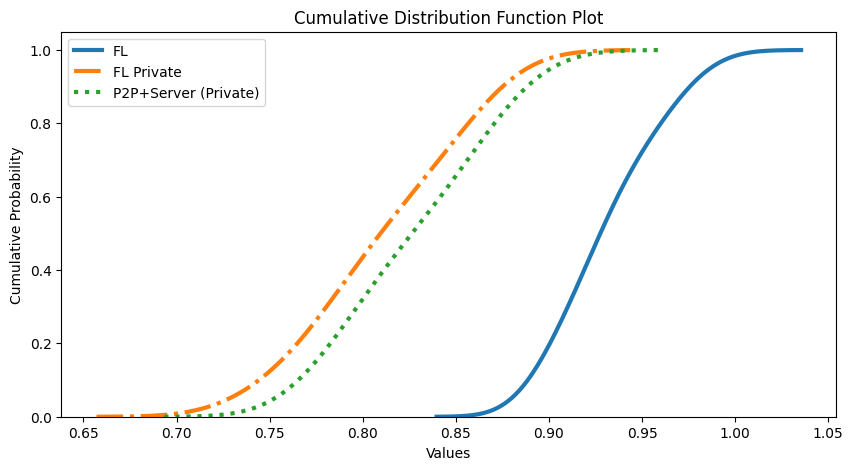

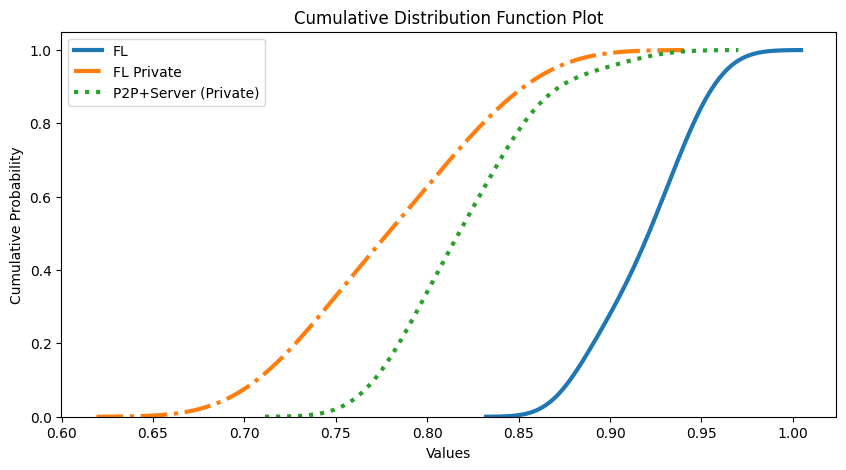

In [16]:
clusters_data = {}
for cluster_name in ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]:
    baseline_list = []
    private_list = []
    p2p_server_list = []
    for node_name in [
        "node 0",
        "node 1",
        "node 2",
        "node 3",
        "node 4",
        "node 5",
        "node 6",
        "node 7",
        "node 8",
        "node 9",
        "node 10",
        "node 11",
        "node 12",
        "node 13",
        "node 14",
    ]:
        last_baseline = get_last_value(
            only_p2p, f"Test Accuracy {cluster_name} {node_name}"
        )
        last_private = get_last_value(
            only_p2p_private, f"Test Accuracy {cluster_name} {node_name}"
        )
        last_p2p_server = get_last_value(
            server_p2p, f"Test Accuracy {cluster_name} {node_name}"
        )
        baseline_list.append(last_baseline)
        private_list.append(last_private)
        p2p_server_list.append(last_p2p_server)
    clusters_data[cluster_name] = {
        "only_p2p": baseline_list,
        "only_p2p_private": private_list,
        "server_p2p": p2p_server_list,
    }

for cluster_name in ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]:
    plot_cdf(
        clusters_data[cluster_name]["only_p2p"],
        clusters_data[cluster_name]["only_p2p_private"],
        clusters_data[cluster_name]["server_p2p"],
    )

### Comparison of local accuracy of the nodes Server+P2P vs P2P+Server

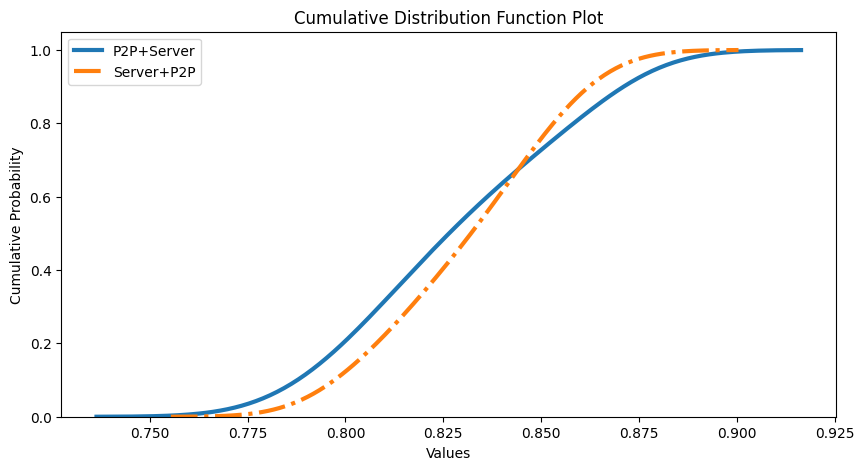

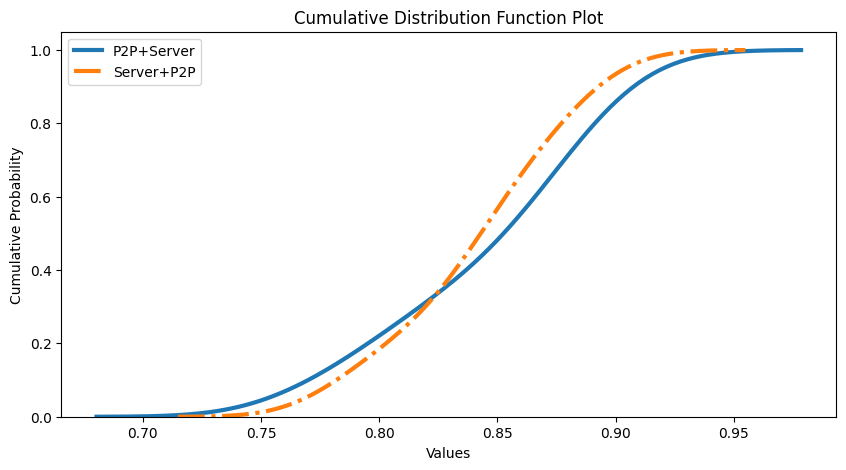

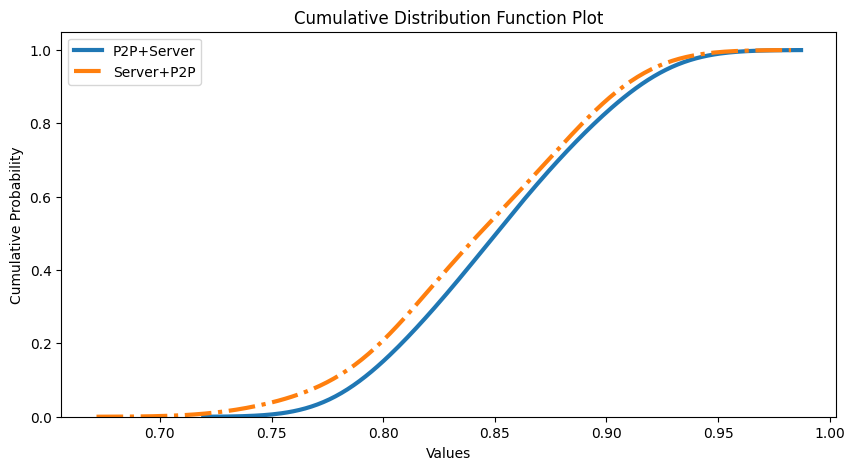

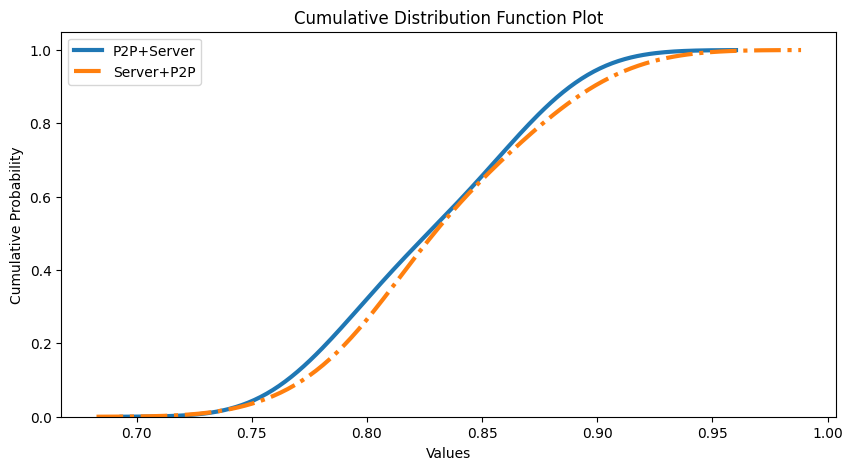

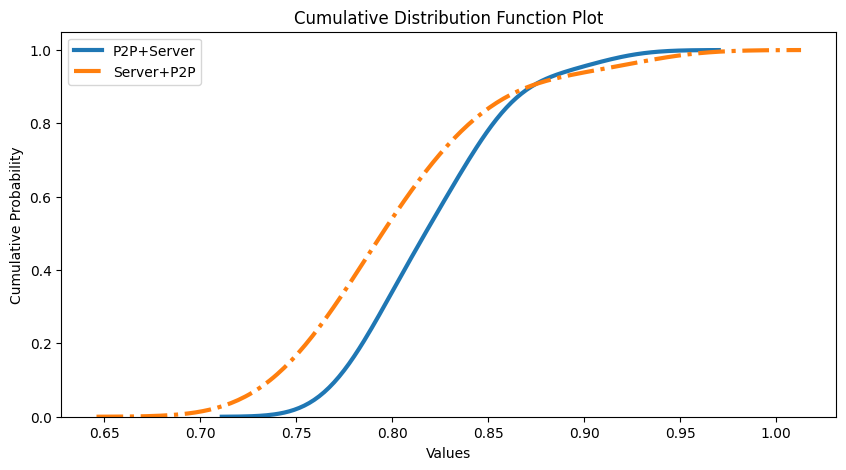

In [17]:
clusters_data = {}
for cluster_name in ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]:
    server_p2p_list = []
    p2p_server_list = []
    for node_name in [
        "node 0",
        "node 1",
        "node 2",
        "node 3",
        "node 4",
        "node 5",
        "node 6",
        "node 7",
        "node 8",
        "node 9",
        "node 10",
        "node 11",
        "node 12",
        "node 13",
        "node 14",
    ]:
        last_server_p2p = get_last_value(
            server_p2p, f"Test Accuracy {cluster_name} {node_name}"
        )
        last_p2p_server = get_last_value(
            p2p_server, f"Test Accuracy {cluster_name} {node_name}"
        )
        server_p2p_list.append(last_server_p2p)
        p2p_server_list.append(last_p2p_server)
    clusters_data[cluster_name] = {
        "server_p2p": server_p2p_list,
        "p2p_server": p2p_server_list,
    }

for cluster_name in ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]:
    plot_cdf_comparison(
        clusters_data[cluster_name]["server_p2p"],
        clusters_data[cluster_name]["p2p_server"],
    )